<a href="https://colab.research.google.com/github/Nega0619/Aiffel_Submitted_Exploration_nodes/blob/main/CV_GoindDeeper_03_Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

오늘은 이미지 data augmentation에 대해서 공부해보았습니다.

# 1. Data augmentation이란?

- 필요한 이유?

Data는 비용과 직결된다.

적은 양의 데이터를 최대한 불려서 많은 양의 데이터로 둔갑시키는 것. => 비용 절약의 효과가 있다.

또한, 다양한 노이즈의 추가로 test환경에서도 잘 돌아가도록 할 수 있다.

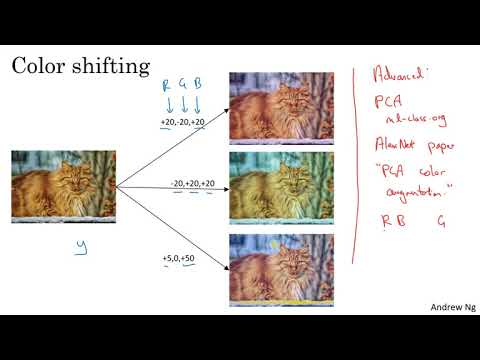

In [1]:
from IPython.display import YouTubeVideo, display 
video = YouTubeVideo("JI8saFjK84o", width=500) 
display(video)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/GoingDeeper\ CV/data

/content/drive/MyDrive/GoingDeeper CV/data


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

## 파일 가져오기

In [5]:
import os
__file__ = '/content/drive/MyDrive/GoingDeeper CV/data/'
sample_img_path = os.path.abspath(os.path.join(os.path.dirname(__file__)))+'/mycat.jpg'
sample_img_path

'/content/drive/MyDrive/GoingDeeper CV/data/mycat.jpg'

In [6]:
from PIL import Image
image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

# 2. Data augmentation 실습

## 2-1. Flip하기

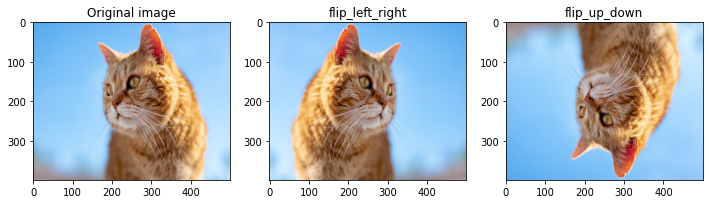

In [7]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)

flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize = (12,12))

plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1, 3, 3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

# 랜덤 확률로 flip하기

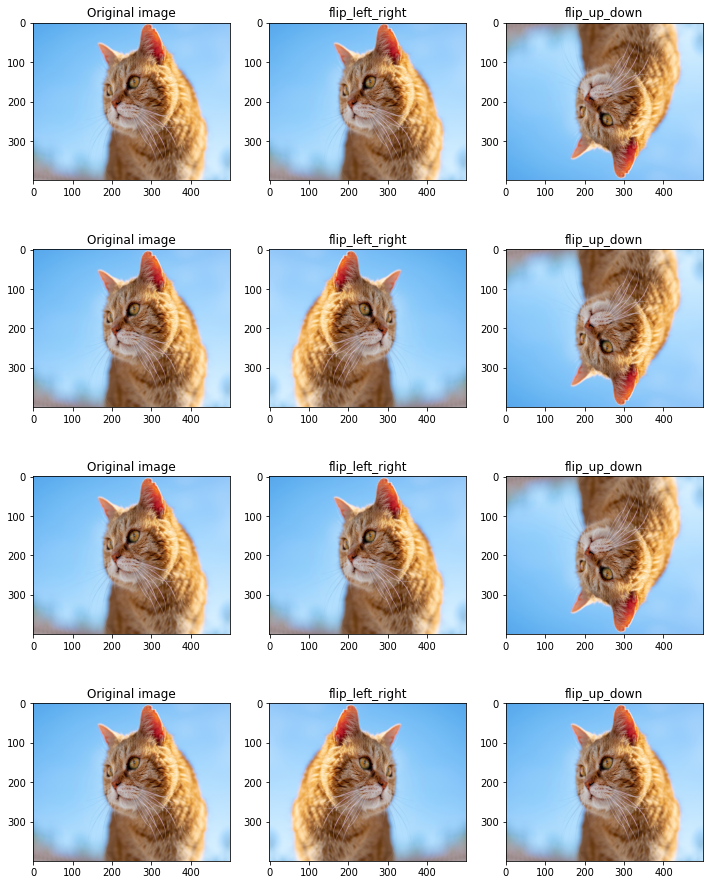

In [8]:
plt.figure(figsize=(12,16))

row=4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

    plt.subplot(4, 3, i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4, 3, i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4, 3, i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## 2-2 Center crop

central_fraction : 얼마나 확대할 지 조절하는 매개변수

-> 1.0인 경우 원본 이미지

-> 객체가 잘려나가지 않도록 적절한 값을 설정해야함

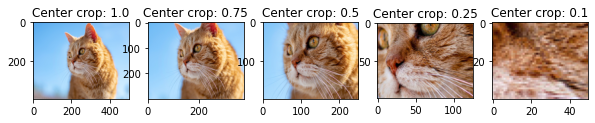

In [9]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)